In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os



In [69]:
df = pd.read_csv("Dataset-1.csv", sep=',', index_col=0, parse_dates=True)
df.reset_index(inplace = True)


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (62) have mixed types.Specify dtype option on import or set low_memory=False.



In [70]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38102 entries, 0 to 38101
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          38102 non-null  int64  
 1   Id                             38102 non-null  object 
 2   Idade                          38102 non-null  int64  
 3   EstadoCivil                    38102 non-null  object 
 4   BillingCity                    38075 non-null  object 
 5   NivelConhecimentoAtual         34956 non-null  float64
 6   ScoreNivelConhecimento         37577 non-null  float64
 7   PerfilInvestidor               38102 non-null  int64  
 8   RendaMensal                    38102 non-null  float64
 9   ValorPatrimonio                25650 non-null  float64
 10  Pergunta1                      37577 non-null  object 
 11  Resposta11                     37577 non-null  object 
 12  Pergunta2                      37577 non-null 

In [71]:
df.shape


(38102, 66)

In [72]:
#Verificando valores faltantes.
df.isna().sum()

index                      0
Id                         0
Idade                      0
EstadoCivil                0
BillingCity               27
                        ... 
Rentabilidade12Meses    7241
RentabilidadeMes        7241
RiscoAtivo              1626
Status                  1619
ProdutoId               1619
Length: 66, dtype: int64

In [73]:
#Verificando se há linhas duplicadas.
print(df[df.duplicated()])


Empty DataFrame
Columns: [index, Id, Idade, EstadoCivil, BillingCity, NivelConhecimentoAtual, ScoreNivelConhecimento, PerfilInvestidor, RendaMensal, ValorPatrimonio, Pergunta1, Resposta11, Pergunta2, Resposta21, Pergunta3, Resposta31, Pergunta4, Resposta41, Pergunta5, Resposta51, Resposta52, Resposta53, Resposta54, Resposta55, Resposta56, Resposta57, Resposta58, Pergunta6, Resposta61, Resposta62, Resposta63, Resposta64, Resposta65, Resposta66, Resposta67, Resposta68, Pergunta7, Resposta71, Resposta72, Resposta73, Resposta74, Resposta75, Pergunta8, Resposta81, Pergunta9, Resposta91, ScoreRisco, ScoreObjetivos, ScoreSituacaoFinanceira, Produto, NomeDoProduto, NomeEmissor, TaxaCliente, TaxaPreCliente, DescricaoProduto, ValorMinimoAplicaInicial, ValorMinimoAplicacaoAdicional, DataVencimento, FamiliaCarteira, ValorInvestidoAtual, ValorRendimento, Rentabilidade12Meses, RentabilidadeMes, RiscoAtivo, Status, ProdutoId]
Index: []

[0 rows x 66 columns]


In [74]:
df.dtypes


index                     int64
Id                       object
Idade                     int64
EstadoCivil              object
BillingCity              object
                         ...   
Rentabilidade12Meses    float64
RentabilidadeMes         object
RiscoAtivo              float64
Status                   object
ProdutoId                object
Length: 66, dtype: object

In [75]:
df.head()

index                                                 Id  Idade  \
0      0  $2b$10$.DCvvJ9WSDpqVP2xXjeSPe9yBilu2JVQh2nFTHN...     30   
1      1  $2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...     25   
2      2  $2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...     25   
3      3  $2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...     25   
4      4  $2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...     25   

  EstadoCivil BillingCity  NivelConhecimentoAtual  ScoreNivelConhecimento  \
0           M     Aracruz                     1.0                     1.0   
1           S    Teresina                     1.0                     1.0   
2           S    Teresina                     1.0                     1.0   
3           S    Teresina                     1.0                     1.0   
4           S    Teresina                     1.0                     1.0   

   PerfilInvestidor  RendaMensal  ValorPatrimonio  ...  \
0                 2       1300.0           6000.0  ...   
1                 2        500.0              NaN  ...   
2                 2        500.0              NaN  ...   
3                 2        500.0              NaN  ...   
4                 2        500.0              NaN  ...   

  ValorMinimoAplicacaoAdicional DataVencimento FamiliaCarteira  \
0                          30.0            NaN      Renda Fixa   
1                          30.0            NaN      Renda Fixa   
2                          30.0            NaN      Renda Fixa   
3                          30.0            NaN      Renda Fixa   
4                          30.0            NaN      Renda Fixa   

  ValorInvestidoAtual ValorRendimento Rentabilidade12Meses RentabilidadeMes  \
0                30.0             NaN                  0.0       0.37005375   
1               150.0             NaN                  0.0       0.05684974   
2                50.0             NaN                  0.0       0.05684974   
3                60.0             NaN                  0.0       0.13178136   
4                40.0             NaN                  0.0       0.15076414   

  RiscoAtivo     Status           ProdutoId  
0        1.0  Efetivada  a0W6A000009GZdgUAG  
1        1.0  Efetivada  a0W6A000009GZdgUAG  
2        1.0  Efetivada  a0W6A000009GZdgUAG  
3        1.0  Efetivada  a0W6A000009GZdgUAG  
4        1.0  Efetivada  a0W6A000009GZdgUAG  

[5 rows x 66 columns]

In [76]:
df.describe()

index         Idade  NivelConhecimentoAtual  \
count  38102.000000  38102.000000            34956.000000   
mean   19050.500000     37.230145                2.480804   
std    10999.244315     11.365521                1.522709   
min        0.000000     17.000000                1.000000   
25%     9525.250000     29.000000                1.000000   
50%    19050.500000     36.000000                2.000000   
75%    28575.750000     43.000000                4.000000   
max    38101.000000     96.000000                5.000000   

       ScoreNivelConhecimento  PerfilInvestidor   RendaMensal  \
count            37577.000000      38102.000000  3.810200e+04   
mean                 2.533678          2.779959  8.368189e+03   
std                  1.538015          1.121397  2.754596e+04   
min                  1.000000          0.000000  0.000000e+00   
25%                  1.000000          2.000000  2.000000e+03   
50%                  2.000000          3.000000  4.200000e+03   
75%                  4.000000          4.000000  1.000000e+04   
max                  5.000000          5.000000  2.400000e+06   

       ValorPatrimonio    ScoreRisco  ScoreObjetivos  ScoreSituacaoFinanceira  \
count     2.565000e+04  37577.000000    37577.000000             37577.000000   
mean      9.122847e+05      2.671874        3.141815                 2.124252   
std       1.498490e+07      1.109866        1.176798                 1.012600   
min       0.000000e+00      1.000000        1.000000                 1.000000   
25%       4.000000e+04      2.000000        2.000000                 1.000000   
50%       2.000000e+05      3.000000        3.000000                 2.000000   
75%       7.000000e+05      3.000000        4.000000                 3.000000   
max       1.500000e+09      5.000000        5.000000                 5.000000   

       TaxaCliente  TaxaPreCliente  ValorMinimoAplicaInicial  \
count  5614.000000     5615.000000              22746.000000   
mean     98.189526        0.413389                744.188094   
std      26.149983        1.776756               2344.743320   
min       0.000000        0.000000                  0.000000   
25%      94.000000        0.000000                 30.000000   
50%     101.000000        0.000000                 30.000000   
75%     113.000000        0.000000                500.000000   
max     140.000000       12.000000              50000.000000   

       ValorMinimoAplicacaoAdicional  ValorInvestidoAtual  ValorRendimento  \
count                   30929.000000         36483.000000      5421.000000   
mean                      360.480540          4046.749768       196.936554   
std                      1032.730307         17034.380766       748.580640   
min                         0.000000             0.000000         0.000000   
25%                        30.000000            40.000000         7.490000   
50%                        30.000000           300.000000        28.080000   
75%                       100.000000          2000.000000       103.750000   
max                     30000.000000        800000.000000     16834.210000   

       Rentabilidade12Meses    RiscoAtivo  
count          30861.000000  36476.000000  
mean               9.666901      2.615309  
std               18.926591      1.532361  
min              -99.693346      0.000000  
25%                0.000000      1.000000  
50%                0.000000      2.000000  
75%               11.122177      4.000000  
max              584.324863      5.000000

In [77]:
plt.style.use('fivethirtyeight')


In [63]:
df.EstadoCivil.unique()

array(['M', 'S', 'C', 'D', 'V', 'I'], dtype=object)

Text(0.5, 1.0, 'Distplot of Idade')

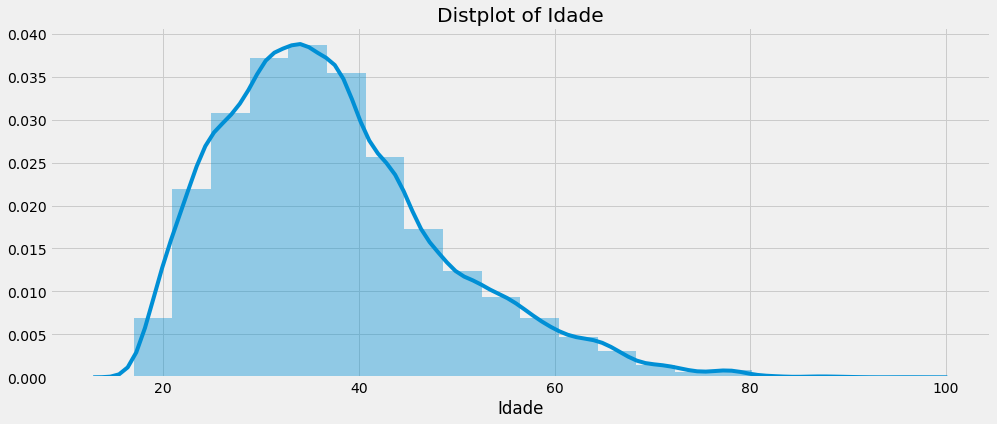

In [82]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(df['Idade'] , bins = 20)
plt.title('Distplot of {}'.format(x))


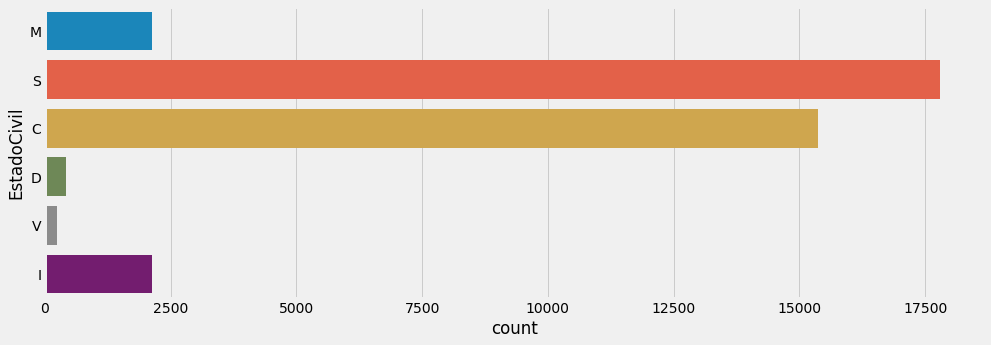

In [85]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'EstadoCivil' , data = df)
plt.show()

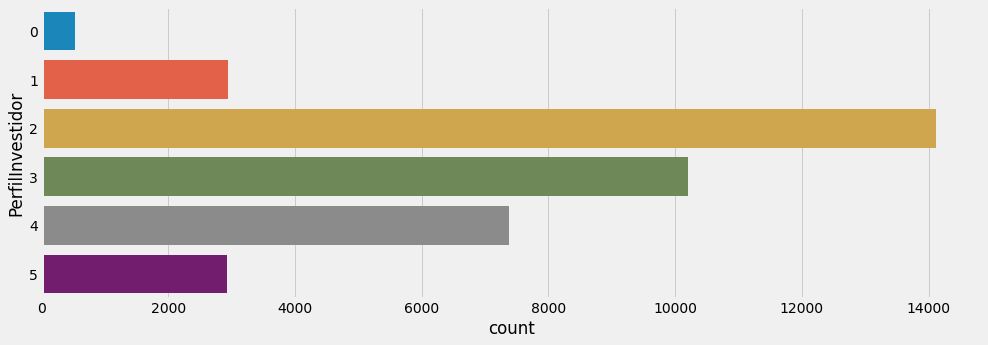

In [91]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'PerfilInvestidor' , data = df)
plt.show()

<Figure size 1080x360 with 0 Axes>

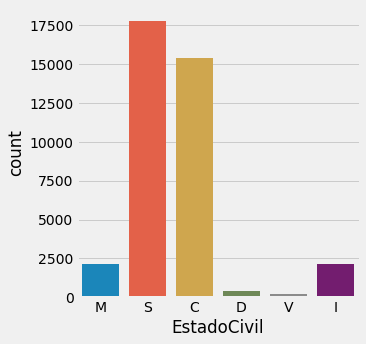

In [94]:
plt.figure(1 , figsize = (15 , 5))
sns.catplot('EstadoCivil', data=df, kind='count')
plt.show()

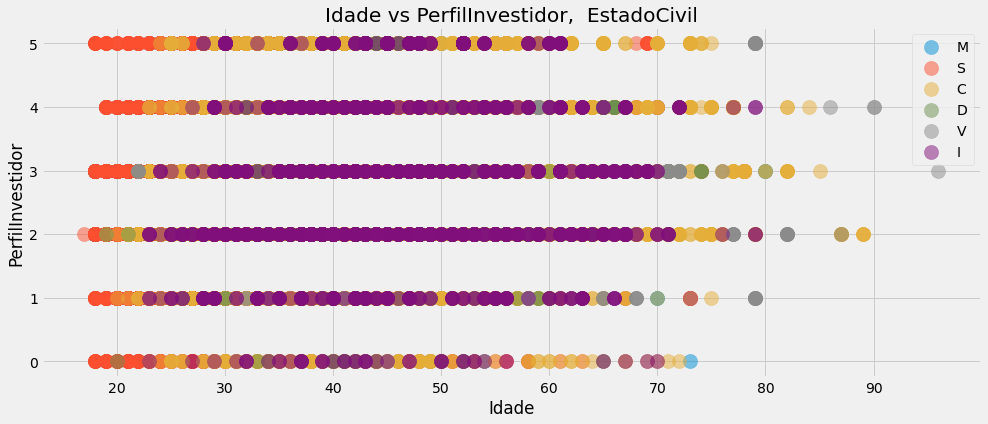

In [90]:
plt.figure(1 , figsize = (15 , 6))
for EstadoCivil in ['M' , 'S','C','D', 'V', 'I']:
    plt.scatter(x = 'Idade' , y = 'PerfilInvestidor' , data = df[df['EstadoCivil'] == EstadoCivil] ,
                s = 200 , alpha = 0.5 , label = EstadoCivil)
plt.xlabel('Idade'), plt.ylabel('PerfilInvestidor') 
plt.title('Idade vs PerfilInvestidor,  EstadoCivil')
plt.legend()
plt.show()

In [99]:
def plot_line_graph(x, hue):
    fig = sns.FacetGrid(df, hue=hue, aspect=4)
    fig.map(sns.kdeplot, x, shade=True)
    fig.set(xlim=(0, df[x].max()))
    fig.add_legend()
    return fig

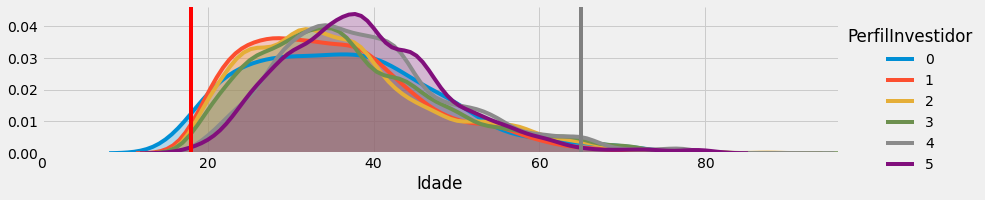

In [100]:
fig = plot_line_graph('Idade', 'PerfilInvestidor')
fig.ax.axvline(18, color='r')
fig.ax.axvline(65, color='gray')